# Fluctuations

## Preamble

In [1]:
%load_ext autoreload

In [16]:
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../')
import fluctuations
import twenty_one
import physics as phys

import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import interp1d

import dill

In [17]:
import matplotlib.pylab as pylab
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Velocity Fluctuations

In [18]:
v_fluc = fluctuations.Velocity_Fluctuations()

### Velocity Correlation Functions

(1, 1000.0)

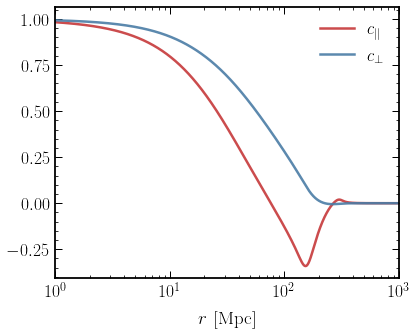

In [19]:
x_ary = np.arange(0, 1000, 0.001)

plt.figure()

plt.xscale('log')

plt.plot(x_ary, v_fluc.cparint(x_ary), label=r'$c_\parallel$')

plt.plot(x_ary, v_fluc.cperpint(x_ary), label=r'$c_\perp$')

plt.legend()

plt.xlabel('$r$ [Mpc]')

plt.xlim(1, 1e3)

### Velocity Power Spectra

In [20]:
k_ary = np.logspace(-3, 1, num=600)

_, Delta2_vrel  = v_fluc.Delta2_v(k_ary) 

_, Delta2_vrel2 = v_fluc.Delta2_v2(k_ary)

k_vrel_fft, Delta2_vrel_fft = v_fluc.Delta2_v(use_logfft=True) 

k_vrel2_fft, Delta2_vrel2_fft = v_fluc.Delta2_v2(use_logfft=True)

Text(0, 0.5, '$\\Delta_{v^2}^2$ [km$^4$ s$^{-4}$]')

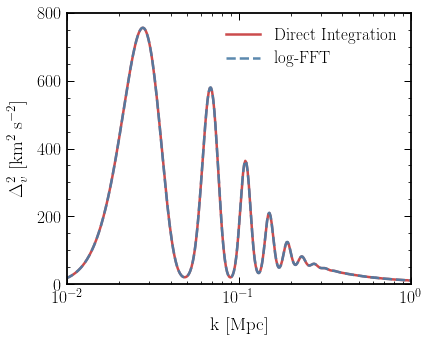

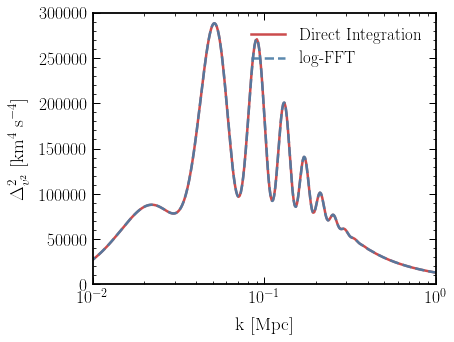

In [21]:
plt.figure()

plt.semilogx(k_ary, Delta2_vrel, label='Direct Integration')
plt.semilogx(k_vrel_fft, Delta2_vrel_fft, '--', label='log-FFT')

plt.legend()

plt.xlim(1e-2, 1)
plt.ylim(0, 800)

plt.xlabel(r'k [Mpc]')
plt.ylabel(r'$\Delta_v^2$ [km$^2$ s$^{-2}$]')

plt.figure()

plt.semilogx(k_ary, Delta2_vrel2, label='Direct Integration')
plt.semilogx(k_vrel2_fft, Delta2_vrel2_fft, '--', label='log-FFT')

plt.legend()

plt.xlim(1e-2, 1)
plt.ylim(0, 3e5)


plt.xlabel(r'k [Mpc]')
plt.ylabel(r'$\Delta_{v^2}^2$ [km$^4$ s$^{-4}$]')

In [22]:
norm_Delta2_vrel = np.trapz(Delta2_vrel / k_ary, k_ary) 
print('Delta_v^2 is normalized to sigma_3D^2: ', norm_Delta2_vrel, 29**2)

norm_Delta2_vrel2 = np.trapz(Delta2_vrel2 / k_ary, k_ary) 
print('Delta_v^2 is normalized to (2/3) * sigma_3D^4: ', norm_Delta2_vrel2, (2/3) * 29**4)

Delta_v^2 is normalized to sigma_3D^2:  840.0686943915025 841
Delta_v^2 is normalized to (2/3) * sigma_3D^4:  470293.98079067114 471520.6666666666


## Temperature Fluctuations

In [23]:
# from scipy.io import loadmat
# xA_param = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/PT_LyACMB_NoRad.mat')
# xA_data = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/xA_LyACMB_NoRad.mat')
# xA_param = loadmat('/users/hongwan/Dropbox (Princeton)/Fluctuations/for_Hongwan/xA_from_Anastasia/PT_LyACMB_NoRad.mat')
# xA_data = loadmat('/users/hongwan/Dropbox (Princeton)/Fluctuations/for_Hongwan/xA_from_Anastasia/xA_LyACMB_NoRad.mat')

# These are the entries where X-ray heating is small. Pick any of these indices. 
# print('Some indices where xA < 1e-3: ', np.argwhere(xA_param['PTout'][:,3] < 1e-3).flatten()[-7:])

# ind = 3184

# print('Parameters: ', xA_param['PTout'][ind, :])
# xA_z_ary = np.arange(6., 51.)

# xA_ary = xA_data['xAout'][ind] 

# # In preparation for log-interpolation
# xA_ary[xA_ary <= 0] = 1e-100

# log10_xA_int = interp1d(xA_z_ary, np.log10(xA_ary))

### Initialization - Temperature Data ###

In [24]:
data_folder = '/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/'
# data_folder = '/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia_old_reversed_z/'

# data_folder = '/users/hongwan/Dropbox (Princeton)/Fluctuations/Vrel_scan/extended_redshift_data_fixed_He_bug/'

mm_string_list = ['10_MeV', '30_MeV', '100_MeV', '300_MeV', '1_GeV', '3_GeV', '10_GeV', '30_GeV', '100_GeV', '300_GeV']

Vlis = np.loadtxt(open(data_folder+'Vlis.csv'), delimiter=',')
Qlis = np.loadtxt(open(data_folder+'Qlis.csv'), delimiter=',')
# zlis is in descending order. Flip to make data stored in positive z order. 
zlis = np.flipud(np.loadtxt(open(data_folder+'zlis.csv'), delimiter=','))

print(zlis)

# in GeV
mmlis = np.array([0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30., 100., 300.])

# dimensions mmlis x zlis x Qlis x Vlis
data = np.array([[np.loadtxt(data_folder+'mc100MeV_mm'+mm_string+'_z_'+str(int(z))+'.csv', delimiter=',') for z in zlis] for mm_string in mm_string_list])


# change to Vlis x Qlis x mmlis x zlis
data = np.transpose(data, axes=(3, 2, 0, 1)) / phys.kB


[ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26.
 27. 28. 29. 30.]


### Initialization - $x_\alpha$ Data ###

In [25]:
from scipy.io import loadmat

# zlis x mmlis x Qlis 
xA_data = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/xA_fiducial.mat')['xa_cases']

dTK_data = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/deltaTK_fiducial.mat')['TK_cases']


# change to Qlis x mmlis x zlis
xA_data = np.transpose(xA_data, axes=(2, 1, 0))
dTK_data = np.transpose(dTK_data, axes=(2, 1, 0))

print(dTK_data.shape)

(90, 10, 22)


In [26]:
data = data + dTK_data

### Converting to 21-cm Brightness Temperature

In [27]:
# dimensions Vlis x zlis x Qlis x mmlis
T21_data = np.moveaxis(twenty_one.T21(zlis, xA_data, data), -1, 1)

print(T21_data.shape)


(161, 22, 90, 10)


Charge Q is:  0.00010531055707361888
m_m mass is:  300_MeV


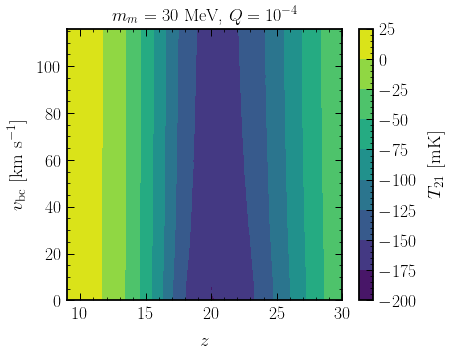

In [28]:
plt.figure()

Q_ind = 30
mm_ind = 3

print('Charge Q is: ', Qlis[30])
print('m_m mass is: ', mm_string_list[3])

plt.contourf(zlis, Vlis * 29, T21_data[:, :, Q_ind, mm_ind] * 1e3)


plt.title(r'$m_m = $ 30 MeV, $Q = 10^{-4}$')

plt.xlabel(r'$z$')
plt.ylabel(r'$v_\mathrm{bc}$ [km s$^{-1}$]')

plt.colorbar(label='$T_{21}$ [mK]')

Text(0, 0.5, '$T_{21}$ [K]')

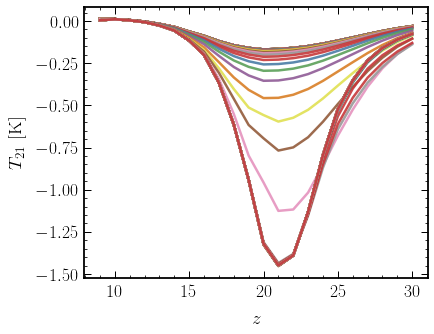

In [32]:
plt.figure()

for i, Q in enumerate(Qlis):
    plt.plot(zlis, T21_data[0, :, i, 4])

plt.xlabel(r'$z$')
plt.ylabel(r'$T_{21}$ [K]')

In [ ]:
# Play with reduced dataset first. 
# dimensions Vlis x zlis x Qlis
# T21_data_reduced = np.array(T21_data[:, :, 70:80])

# print(T21_data_reduced.shape)

In [ ]:
%autoreload 

data_dict = {'z': zlis, 'Q': Qlis, 'm_m': mmlis}

T21_fluc = fluctuations.Fluctuations(Vlis*29., T21_data, data_dict=data_dict)

In [ ]:
_ = T21_fluc.Delta2_f()

k_ary, xi_fft_ary = T21_fluc.power_spec 

r_ary = np.logspace(-3, 4, 1000)

xi_f_ary = T21_fluc.xi_f(r_ary, fine_mesh=True)



In [ ]:
plt.figure()

plt.loglog()

# x_ary x zlis x Qlis x mmlis

plt.plot(r_ary, 1e6*xi_f_ary[:,:,0,0])


plt.xlabel(r'$r$ [Mpc]')
plt.ylabel(r'$\langle T_{21} \rangle^2 \xi_{T_{21}}$ [mK$^{2}$]')

# plt.xlim(9e-4, 2e-3)
# plt.xlim(1e2, 4e2)
# plt.ylim(1e-4, 1e-2)

In [ ]:
plt.figure()

plt.loglog()


plt.plot(k_ary, xi_fft_ary[:,:,70,0]*1e6)

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$\langle T_{21} \rangle^2 \Delta_{T_{21}}^2$ [mK$^{2}$]')

plt.xlim(1e-2, 1)
plt.ylim(1e-2, 1e5)


In [ ]:
plt.figure()

plt.yscale('log')

print(k_ary[1000])

plt.plot(zlis, np.transpose(xi_fft_ary[::200,:,0,0])*1e6)

plt.xlabel(r'$z$')
plt.ylabel(r'$\langle T_{21} \rangle^2 \Delta_{T_{21}}^2$ [mK$^{2}$]')

plt.xlim(9, 30)
# plt.ylim(1e-2, 1e4)

In [ ]:
T21_fluc.data_dict

In [ ]:
# dill.dump(T21_fluc, open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/mc100MeV_mm'+mm_string+'.p', 'wb'))

dill.dump(T21_fluc, open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/mc100MeV_full_smooth_deg3_fid_xA_fid_dTK.p', 'wb'))